<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/it/thumb/e/e2/Stemma_unipi.svg/900px-Stemma_unipi.svg.png?20221226121859" width="300px" alt="Logo University of Pisa">
</div>
<h1 align="center" style="height: 60px;"></h1>
<h1 align="center" style="height: 60px;">UNIVERSITY OF PISA</h1>
<h2 align="center" style="height: 60px;">MASTER’S DEGREE IN ARTIFICIAL INTELLIGENCE AND DATA ENGINEERING</h2>
<h3 align="center">Multimedia Information Retrieval and Computer Vision</h3>
<div style="height: 40px;"></div>
<h2 align="center">RAGING BULL Group</h2>
<div style="height: 80px;"></div>

<div style="display: flex; justify-content: space-around;">
    <div style="width:200px;">
        <p>Professor:</p>
        <ul>
            <li>Nicola Tonellotto</li>
        </ul>
    </div>
    <div style="width:200px;">
        <p>Students:</p>
        <ul>
            <li>Cleto Pellegrino</li>
            <li>Giuseppe Soriano</li>
            <li>Massimiliano Romani</li>
            <li>Francesco Boldrini</li>
        </ul>
    </div>
</div>
<div style="height: 80px;"></div>
<hr>
<h3 align="center">A.Y. 2024/2025</h3>
<hr>

## Introduction

The idea behind this project is to develop a Language model capable of writing at least Shakespearean sentences, at best entire new plays inspired by Shakespeare and then compare the results in terms of loss of the functions. 

Following this idea, two types of models will be created, trained and tested: a Simple Feed Forward Neural Network and a Generative Pre-trained Transformer.

Both models are not capable of using raw text to train themselves: they need numbers. The best way to provide them numbers from a text is to use a `Tokenizer`, a function that takes as input a string containing text and provides as result a list of numbers.

The text is divided following the tokenizer's idea and each unique token receives a unique number that identifies it. This process is called `encoding` and given as input a text, provides a list of tokens' identifiers.

The list of tokens' identifiers can then be used to train the models.

Once the models are trained, they can generate a list of tokens' identifiers, which can be transformed back into text through the process of `decoding`. This process takes the list of tokens and create a text by substituting each number in the list with the token identified by the number.

As it is possible to see, the tokenizer plays a very important role in the performance of the model, since the number of parameters of the latter directly depends to the dimension of the `vocabulary`, which is the set of unique tokens of the tokenizer.

A single token can be any sequence of text, numbers or special characters, from a single character "a" to a single word "Romeo" to long and complex sentence like "to be or not to be that is the question". The more specific a token is, the more rare it will result and therefore difficult for the model to find its correct usage, but also the more the generated text will have the probability of having human sense. The simpler the token is, the less rare it will result and therefore the higher the probability that the neuron holding that token will be trained. At the same time, creating a grammatically, syntactically and sensible sentence by concatenating single characters and special characters like whitespace is more difficult than using entire sentences or even single words.

Therefore, finding the right dimensions of the vocabulary and the right algorithm to divide a text in tokens is the key to obtain the model with the best performance.

In this project it was decided to explore three solutions for a Tokenizer: a Char Tokenizer, a Syllable Tokenizer and a TikToken Tokenizer. These three choices will be better explained in the following sections, but the main idea was to use a simple, a medium complexity and a complex tokenizers to see which could be the results.

In [1]:
# comment all code below if you are not running the first time

# install required packages
# %pip install --upgrade pip
# %pip install tiktoken
# %pip install pandas
# %pip install matplotlib
# %pip install numpy
# %pip install seaborn
# %pip install pyphen
# %pip install re
# %pip install torch
# %pip install nltk
# %pip install flash_attn

<div class="alert alert-block alert-danger">
DO NOT EXECUTE OUTSIDE OF DESIGNATED SERVER
</div>

### DO NOT EXECUTE OUTSIDE OF DESIGNATED SERVER

The following code has been run on https://jupyter.herocod.com due to computational capacity limitations

The access token has been shared directly through mail

In [2]:
import torch # type: ignore
import os # type: ignore
import requests # type: ignore
import pyphen # type: ignore
import re # type: ignore
import tiktoken # type: ignore
import torch # type: ignore
import torch.nn as nn # type: ignore
from torch.nn import functional as F # type: ignore
from tqdm import tqdm # type: ignore
import math # type: ignore
import matplotlib.pyplot as plt # type: ignore
import wget #type: ignore

In [3]:
if not os.path.exists('input.txt'):
    url = 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt'
    #response = requests.get(url)
    wget.download(url,"input.txt")

with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

### Common Hyperparameters ###

The Common configuration for the trained LMs should only be managed here

In [4]:
max_iters = 5000
eval_interval = 1000
eval_iters = 200
device = 'cuda' if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else 'cpu'

## **Tokenizers**

<p>In this section, the three different tokenizers used by the models are going to be described, from the main idea to the real implementation.</p>

### Char Tokenizer

<p>This tokenizer breaks each word into single characters and saves each of them as a single token. Special characters, like % or & and numbers are saved as tokens as well.</p>
<p>The main idea behind this method is to have the smallest vocabulary possible, since each word in the english alphabet is composed by a combination of the 27 characters of the alphabet, the vocabulary is surely the smallest, even counting the special characters.</p>

In [5]:
# create a mapping from characters to integers
chars = sorted(list(set(text)))
vocab_size_chars = len(chars)
print(''.join(chars))
print(vocab_size_chars)

stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
char_encoder = lambda s: [stoi[c] for c in s]
char_decoder = lambda l: ''.join([itos[i] for i in l])


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65



**Purpose**:
- This cell implements the logic for a character-based tokenizer by encoding each unique character in the text with a corresponding integer.

**Detailed Explanation**:
1. **`chars = sorted(list(set(text)))`**:
   - Extracts the unique characters in the dataset and sorts them to maintain consistent ordering.
   - For example, if the dataset contains `"hello"`, `list(set(text))` will give `['h', 'e', 'l', 'o']`, and sorting ensures deterministic order (lexicographical).
2. **`vocab_size_chars`**:
   - Stores the total number of unique characters in the dataset. This becomes the vocabulary size for character-based modeling.
   - Printed to verify the size (useful for debugging).
3. **Dictionaries (`stoi`, `itos`)**:
   - **`stoi` (string-to-integer)**:
     - Maps each unique character (`ch`) to its corresponding integer index (`i`).
   - **`itos` (integer-to-string)**:
     - Maps integer indices back to their original characters.
   - Together, they allow for bi-directional lookups (encoding and decoding).
4. **Lambda functions**:
   - **`char_encoder`**:
     - Encodes a string as a list of integers based on the `stoi` dictionary.
     - For example, `"hello"` becomes `[7, 4, 11, 11, 14]`.
   - **`char_decoder`**:
     - Decodes a list of integers back to the original string using the `itos` dictionary.
     - For example, `[7, 4, 11, 11, 14]` becomes `"hello"`.

**Outputs**:
- **Print Statement**:
  - Displays all unique characters to the console as a string for inspection.
  - Prints the vocabulary size (`vocab_size_chars`) to inform how many unique characters will be handled by the tokenizer.

**Use Cases**:
- The output is useful for training simple character-based language models that predict sequences at the character level.

### **Syllable Tokenizer**

<p>In the following block there is the implementation of a syllable tokenizer. The idea behind this choice is to divide words in syllables and saving each syllable/hyphen as a unique token. Since each syllable represents a vocalic sound, there is an high probability that different words share some syllable, therefore there is the possibility to shrink down the size of the vocabulary with respect to the choice of saving each word as a single token.</p>

In [6]:
dic = pyphen.Pyphen(lang='en_US')

def create_syllable_tokenizer():
    syllable_to_index = {}
    index_to_syllable = {}

    def encode(text):
        # Use regex to include every character separtely, syllables, spaces and symbols included
        tokens = re.findall(r'\w+|[^\w]', text, re.UNICODE)  # Divides text in symbols, words and spaces
        encoded = []
        for token in tokens:
            if token.isalpha():  # Divides words in syllables
                syllables = dic.inserted(token).split("-")
            else:
                syllables = [token]   # Other characters are considered as they are

            for syllable in syllables:
                if syllable not in syllable_to_index:
                    idx = len(syllable_to_index)
                    syllable_to_index[syllable] = idx
                    index_to_syllable[idx] = syllable
                encoded.append(syllable_to_index[syllable])

        return encoded

    def decode(indices):
        return ''.join(index_to_syllable[idx] for idx in indices)

    return encode, decode, syllable_to_index, index_to_syllable

syllab_encoder, syllab_decoder, syllable_to_index, index_to_syllable = create_syllable_tokenizer()

**Purpose**:
- This code implements a syllable-based tokenizer for natural language text processing. It encodes and decodes syllables from the text, enabling language models to work on syllable-level representations instead of word or character-level ones.

**How It Works**:
1. **`Pyphen` Initialization**:
   - The `pyphen.Pyphen` library is used, specifying `en_US` (US English) as the language for syllable breaking.
   - It provides a dictionary-based method for splitting words into syllables accurately.
   
2. **`create_syllable_tokenizer()` Function**:
   - Initializes two mappings:
     - `syllable_to_index`: Maps each unique syllable to an integer (for encoding).
     - `index_to_syllable`: Maps integers back to their corresponding syllables (for decoding).

3. **`encode(text)`**:
   - Tokenizes the input text into words, punctuation, and spaces using a regular expression (`re.findall(r'\w+|[^\w]', text)`).
   - For words (`token.isalpha()`), splits them into syllables using `Pyphen`'s `.inserted()` method. Non-alphabetic tokens (punctuation, spaces) are directly preserved.
   - Each syllable is assigned an integer ID via `syllable_to_index`. If a syllable is new, it is added to this dictionary dynamically.
   - Returns a list of integers representing the syllables in the input text.

4. **`decode(indices)`**:
   - Converts a list of integer indices back into the corresponding syllables using `index_to_syllable`.
   - Reconstructs the original text by joining syllables.

5. **Outputs**:
   - `syllab_encoder`: The encoder function for converting text into integer-encoded syllables.
   - `syllab_decoder`: The decoder function for converting integer indices back into text.
   - `syllable_to_index`: The mapping from syllables to integers.
   - `index_to_syllable`: The reverse mapping from integers to syllables.

**Theoretical Functionality**:
- Syllable-level tokenization can capture phonetic and semantic components between word-level and character-level tokenization. It works well for languages with syllabic features and simplifies vocabulary compared to word-level tokenization.


### **Tiktoken Tokenizer**

In the following block there is the implementation of the TikToken Tokenizer, the one used by OpenAI for their ChatGPTs. There are different types of encoding, each one used in different model.

For the scope of this project `cl100k_base` encoding will be used.

In normal situations, once declared the variable encoding:
```Python
encoding = tiktoken.get_encoding("cl100k_base")
```
the whole process of encoding and decoding text can be done using the methods:
```Python
# Encode the text
encoded_text = encoding.encode(text)
# Decode the text
decoded_text = encoding.decode(encoded_text)
```
The problem with this solution is that even if the text is as simple as "Hello", the vocabulary that will be used in the creation of the model will include all the terms of the encoding base, which in this case includes a little more than 10000 unique tokens.

Since this would solution would led to hude number of parameters, most of which will never be seen in training by the model with this training corpus, and the computational resources needed exceeds the capabilities and the scope of this project, it was decided to opt for a more convenient solution: Utilize the vocabulary of the tiktoken base `cl100k_base` but eliminating from the final vocabulary all the unused terms.

In [7]:
encoding = tiktoken.get_encoding("cl100k_base")

vocab = set(encoding.encode(text))

dict_1 = {c: i for i, c in enumerate(vocab)}
dict_2 = {i: c for i, c in enumerate(vocab)}

def encode_tiktoken(text):
    # encoding.encode(text)
    encodings = encoding.encode(text)
    encodings = [dict_1[c] for c in encodings]
    return encodings

def decode_tiktoken(tokens):
    tokens = [dict_2[c] for c in tokens]
    return encoding.decode(tokens)

vocab_size_tiktoken = len(vocab)
print(vocab_size_tiktoken)

12111



**Purpose**:
- Implements tokenization and detokenization using OpenAI's `tiktoken` library. This tokenizer is specifically designed for tokenizing text as required by OpenAI's GPT models.

**How It Works**:
1. **`tiktoken.get_encoding()`**:
   - Fetches the tokenizer encoding for a particular OpenAI model.
   - In this case, `"cl100k_base"` is used, which is OpenAI’s encoding for models like `gpt-3.5-turbo`.
   - Different encodings may result in different vocabularies and tokenization behaviors.

2. **Vocabulary Size**:
   - `vocab_size_tiktoken` gives the total number of unique tokens defined in the tokenizer's vocabulary.
   - Prints this value for reference.

3. **Encoder Function (Tokenization)**:
   - `encode_tiktoken(text)` converts input text into a list of integer tokens based on the model's vocabulary and rules.
   - Example: `"Hello world!"` might be tokenized as `[15496, 2159, 0]`.

4. **Decoder Function (Detokenization)**:
   - `decode_tiktoken(tokens)` takes a list of integer tokens and reconstructs the original text.
   - Example: `[15496, 2159, 0]` would decode back into `"Hello world!"`.

**Output**:
- The functions (`encode_tiktoken` and `decode_tiktoken`) are used for tokenizing text and reversing the process as needed by models trained with tiktoken-compatible data.

**Why Use Tiktoken?**:
- It handles multi-byte characters, spaces, punctuation, and other complex tokenization rules effectively, optimizing tokenization for pre-trained GPT models.

<p>In the next block there is the implementation of the function <b>create_datasets</b> which takes as input the string with the works of Shakespeare and outputs train and test data for each tokenizer previously described. the length of the vocabulary of the syllable tokenizer is outputted as well because this tokenizer, as previously shown, build the vocabulary as it processes the text.</p>

In [9]:
torch.manual_seed(1337)

def create_datasets(text):

    # Train and test splits
    char_data = torch.tensor(char_encoder(text), dtype=torch.long)
    n = int(0.9*len(char_data)) # first 90% will be train, rest val
    train_char_data = char_data[:n]
    val_char_data = char_data[n:]

    syllab_data = torch.tensor(syllab_encoder(text), dtype=torch.long)
    n = int(0.9*len(syllab_data)) # first 90% will be train, rest val
    train_syllab_data = syllab_data[:n]
    val_syllab_data = syllab_data[n:]

    vocab_size_syllabs = len(syllable_to_index)
    print(vocab_size_syllabs)

    t_data = torch.tensor(encode_tiktoken(text), dtype=torch.long)
    n = int(0.9*len(t_data)) # first 90% will be train, rest val
    train_t_data = t_data[:n]
    val_t_data = t_data[n:]

    return train_char_data, val_char_data, train_syllab_data, val_syllab_data, train_t_data, val_t_data, vocab_size_syllabs

**Purpose**:
- Splits the dataset into training and validation sets (90% for training, 10% for validation) across all three tokenization methods: character-level, syllable-level, and tiktoken-level.

**How It Works**:
1. **Character Data**:
   - Encodes the input text using `char_encoder` into integer tokens.
   - Converts to a PyTorch tensor (`torch.tensor`) for easier compatibility in training loops.
   
2. **Syllable Data**:
   - Encodes the text into syllable-level tokens using `syllab_encoder`, converts them into PyTorch tensors, and splits into train/validation sets.

3. **Tiktoken Data**:
   - Uses `encode_tiktoken` to convert text into OpenAI’s token format and then splits into train/validation.

4. **Vocabulary Sizes**:
   - Prints the syllable vocabulary size (`vocab_size_syllabs`) for reference.

**Output**:
- Returns the training and validation datasets for all three tokenization schemas.
- Additionally yields the syllable vocabulary size, which is required for subsequent model building.

**Why Factory-Style Function?**
- Modularizes the dataset creation process so it can be reused flexibly by different models/tokenization methods.

### **Learning Rate Exploration**


In [10]:
# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?
learning_rate = 1e-2
# ------------

In [11]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

**Purpose**:
- Defines a function `get_batch` to dynamically create batches of input (`x`) and target (`y`) data for either the training or validation split.

**How It Works**:
1. **`data = train_data if split == 'train' else val_data`**:
   - Determines whether to use training or validation data based on the `split` parameter.
   
2. **Random Index Sampling**:
   - **`torch.randint(len(data) - block_size, (batch_size,))`**:
     - Randomly selects `batch_size` starting indices for sequences of length `block_size`.
     
3. **Batch Creation**:
   - For each randomly sampled starting index, slices the data into:
     - **`x`:** A sequence of length `block_size`.
     - **`y`:** The next sequence of the same length as `x`, offset by one (serves as the model's ground truth target for predicting the next tokens).

4. **Move Data to Device**:
   - Transfers both `x` and `y` tensors to the specified computational device (e.g., GPU if available).

**Output**:
- Returns a batch of inputs (`x`) and targets (`y`).

**Applications**:
- Efficient batching allows the model to process multiple sequences simultaneously, improving training efficiency.

In [12]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()  
    model.train()
    return out


**Purpose**:
- Defines a utility function `estimate_loss` to evaluate the average loss for both the training and validation sets over `eval_iters` batches.

**How It Works**:
1. **`@torch.no_grad()`**:
   - Disables gradient computation for this function, saving memory and computational effort during loss evaluation.
   
2. **Model in Evaluation Mode**:
   - **`model.eval()`**:
     - Puts the model in evaluation mode, disabling dropout layers or other behaviors specific to training.
     
3. **Iterate Over Splits**:
   - Evaluates losses for both training and validation data.
   - Initializes a tensor (`losses`) of zeros to store individual batch losses for `eval_iters` iterations.
   
4. **Compute Loss**:
   - Calls `get_batch(split)` to retrieve a batch.
   - Performs a forward pass (`model(X, Y)`) to compute logits and the associated loss for each batch.
   - Records the loss value in the `losses` tensor.

5. **Aggregate Losses**:
   - Computes the mean loss for the current split and stores it in the dictionary `out`.

6. **Return to Training Mode**:
   - **`model.train()`** switches the model back to training mode.

**Output**:
- Returns a dictionary `out` with average training and validation losses (`{'train': ..., 'val': ...}`).

**Importance**:
- Helps monitor the model's performance on both training and validation data, enabling early detection of overfitting.

In [14]:
# Generate a range of learning rates for testing (10^-6 to 10^0)
lr_exponents = torch.linspace(-5, -2, steps=80)  # Exponents from -5 to -2
learning_rates = 10 ** lr_exponents  # Learning rates from 10^-5 to 10^-2

In [ ]:
def calculate_best_lr(model, optimizer, num_batches_per_lr=100):
    print("Running Learning Rate Range Test...")
    lr_losses = []
    lr_values = []

    # Save the initial state of the model and optimizer
    initial_model_state = model.state_dict()
    initial_optimizer_state = optimizer.state_dict()

    model.train()
    for i, lr in enumerate(learning_rates):
        # Reset the model and optimizer to their initial state
        model.load_state_dict(initial_model_state)
        optimizer.load_state_dict(initial_optimizer_state)

        for g in optimizer.param_groups:
            g['lr'] = lr
        avg_loss = 0
        for _ in range(num_batches_per_lr):
            xb, yb = get_batch('train')
            optimizer.zero_grad(set_to_none=True)

            logits, loss = model(xb, yb)

            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        avg_loss /= num_batches_per_lr
        lr_losses.append(avg_loss)
        lr_values.append(lr)
        if i % 10 == 0:
            print(f"Step {i}/{len(learning_rates)}: LR={lr:.1e}, Loss={avg_loss:.4f}")
        
    # Print the best learning rate
    best_lr = lr_values[lr_losses.index(min(lr_losses))]
    print(f"Best LR: {best_lr:.1e}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(lr_values, lr_losses)
    plt.xscale("log")
    plt.xlabel('Learning Rate (log scale)')
    plt.ylabel('Training Loss')
    plt.title('Learning Rate Range Test')
    plt.show()

    return best_lr

**Purpose**:
- Implements a "learning rate range test" to empirically determine the learning rate that yields the lowest training loss during a trial run.

**How It Works**:
1. **Save Model and Optimizer States**:
   - Saves the initial weights of the model (`initial_model_state`) and optimizer parameters (`initial_optimizer_state`). This ensures that for each learning rate tested, the model and optimizer can reset to their initial state, ensuring fairness in testing.

2. **Iterate Over Learning Rates**:
   - For each learning rate in the `learning_rates` array:
     - Reset the model and optimizer to their initial saved states.
     - Update the learning rate in the optimizer (`g['lr'] = lr`).

3. **Evaluate Average Loss**:
   - For each learning rate, trains the model for `num_batches_per_lr` mini-batches (`get_batch('train')` provides training data).
   - At each step, computes the average loss over these batches.

4. **Track and Print Results**:
   - Records the average loss (`avg_loss`) for each tested learning rate.
   - Prints intermediate progress every 10 tested learning rates.

5. **Find Best Learning Rate**:
   - Finds the learning rate that produces the minimum loss across all learning rates and prints it for the user.

6. **Plot Results**:
   - Plots the losses against learning rates on a logarithmic x-axis to visually inspect the trend.
   - The lowest region in the loss curve suggests the best learning rate.

**Output**:
- Returns the best learning rate based on the minimum computed training loss.

**Why It’s Useful**:
- This method provides an intuitive and visual way to determine a learning rate that will likely yield stable training and fast convergence.

## **Feed Forward model**
In the next block there is the implementation of a Simple Feed Forward neural network model that is going to be trained and used as a comparison with the GPT model.

In [ ]:
class SimpleFeedForward(nn.Module):
    def __init__(self, n_emb, block_size, feed_forward_size, vocab_size):
        super(SimpleFeedForward, self).__init__()
        self.e = nn.Embedding(vocab_size, n_emb)
        self.w1 = nn.Linear(n_emb * block_size, feed_forward_size)
        self.b1 = nn.Parameter(torch.zeros(feed_forward_size))
        self.w2 = nn.Linear(feed_forward_size, vocab_size)
        self.b2 = nn.Parameter(torch.zeros(vocab_size))


    def forward(self, idx, targets=None):
        B, T = idx.shape

        x = self.e(idx)
        x = x.view(x.size(0), -1)
        x = self.w1(x)
        x = x + self.b1
        x = F.tanh(x)
        x = self.w2(x)
        logits = x + self.b2

        if targets is None:
            loss = None
        else:
            loss = F.cross_entropy(logits, targets[:, -1])

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx[:, block_size :]



**Purpose**:
- Implements a simple feed-forward model to perform language modeling tasks. It predicts the probability of the next token given the current input sequence.

**Key Components**:
1. **Embedding Layer**:
   - **`self.e`** maps input token indices to dense vector embeddings (`n_emb` dimensions).

2. **Fully-Connected Layers**:
   - **`self.w1`** (Input → Feed-forward size): Encodes block-size context into a larger intermediate representation.
   - **`self.w2`** (Feed-forward size → vocab_size): Maps the intermediate representation back to token probabilities.

3. **Parameters**:
   - Learnable biases (`b1`, `b2`) are manually added to improve the forward layer behavior.

4. **Forward Method**:
   - Takes input indices `idx` (of shape `[batch_size, block_size]`), embeds them, and predicts logits for the next token's probability distribution.
   - If `targets` are provided, also computes cross-entropy loss comparing predictions (`logits`) against `targets`.

5. **Generate Method**:
   - Implements autoregressive generation where the model predicts tokens iteratively (`max_new_tokens` steps), appending predictions to the input context.

In [16]:
train_char_data, val_char_data, train_syllab_data, val_syllab_data, train_t_data, val_t_data, vocab_size_syllabs = create_datasets(text)

8589


In [17]:
n_emb = 2
block_size = 10
feed_forward_size = 300
batch_size = 1024

In [18]:
m_c = SimpleFeedForward(n_emb, block_size, feed_forward_size, vocab_size_chars).to(device)
print(sum(p.numel() for p in m_c.parameters())/1e6, 'M parameters')
m_s = SimpleFeedForward(n_emb, block_size, feed_forward_size, vocab_size_syllabs).to(device)
print(sum(p.numel() for p in m_s.parameters())/1e6, 'M parameters')
m_t = SimpleFeedForward(n_emb, block_size, feed_forward_size, vocab_size_tiktoken).to(device)
print(sum(p.numel() for p in m_t.parameters())/1e6, 'M parameters')

0.02636 M parameters
2.617656 M parameters
3.688344 M parameters


**Purpose**:
- Initializes three models (for each tokenization strategy) and computes the total number of model parameters.

**How It Works**:
1. **Model Initialization**:
   - Constructs a `SimpleFeedForward` model for:
     - Character-based tokenization (`m_c`).
     - Syllable-based tokenization (`m_s`).
     - Tiktoken-based tokenization (`m_t`).

2. **Parameter Count**:
   - **`sum(p.numel() for p in model.parameters())`** computes the total number of trainable parameters in each model.
   - Divides by 1 million to display the count in millions (`M`).

3. **Device Transfer**:
   - Each model is moved to the computational device (e.g., GPU).

**Output**:
- Prints the number of parameters for each model variation.

**Why Parameter Count Matters**:
- Larger models (with more parameters) tend to capture more complex patterns but require more memory and training time.

### **How many parameters do the Simple Feed Forward models have ?**
- Char Tokenizer: 0.02636 Millions of parameters
- Syllable Tokenizer: 2.617656 Millions of parameters
- TikToken Tokenizer: 3.688344 Millions of parameters

### Syllable Tokenizer's Simple Feed Forward model

Running Learning Rate Range Test...
Step 0/80: LR=1.0e-05, Loss=9.0166
Step 10/80: LR=2.4e-05, Loss=7.2824
Step 20/80: LR=5.7e-05, Loss=4.8091
Step 30/80: LR=1.4e-04, Loss=4.2047
Step 40/80: LR=3.3e-04, Loss=3.9790
Step 50/80: LR=7.9e-04, Loss=3.7549
Step 60/80: LR=1.9e-03, Loss=3.5298
Step 70/80: LR=4.6e-03, Loss=3.3715
Best LR: 5.4e-03


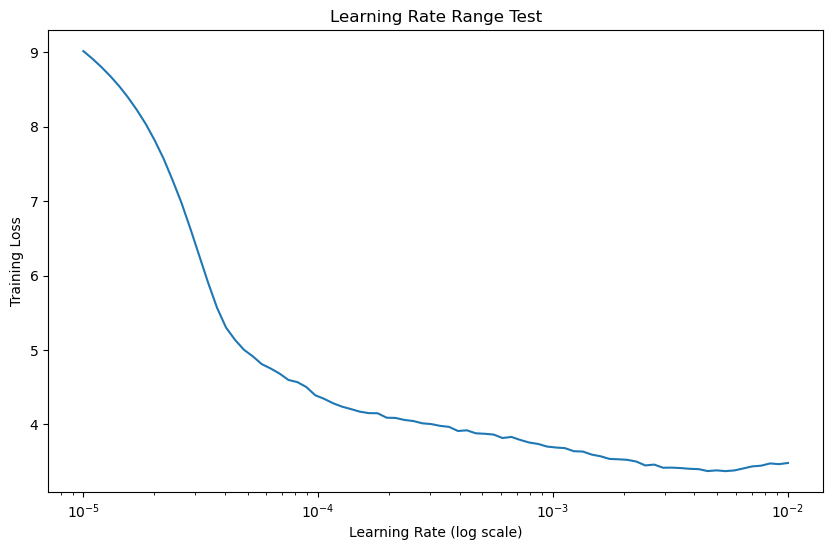

  0% 5/5000 [00:09<2:01:28,  1.46s/it] 

step 0: train loss 3.4162, val loss 4.0534


 20% 1005/5000 [00:46<36:28,  1.83it/s]

step 1000: train loss 2.9705, val loss 3.8205


 40% 2005/5000 [01:22<27:05,  1.84it/s]

step 2000: train loss 2.8466, val loss 3.8582


 60% 3005/5000 [01:58<17:45,  1.87it/s]

step 3000: train loss 2.7820, val loss 3.8791


 80% 4005/5000 [02:35<08:49,  1.88it/s]

step 4000: train loss 2.7182, val loss 3.8997


100% 5000/5000 [03:11<00:00, 26.12it/s]

step 4999: train loss 2.6774, val loss 3.9122


cluson, which will'in low.

FRIAR LAURENCE:
Hold he,
And cost.
O, to thee to Rome,
For he, nor the guest: whether if that all no?

LUCIO: Hortson low boy: and am place.

AEdile:
Here, trumcome. Come,
I bear thy litence for this love.

ISABELLAassd damn'd goodsaulti
Rather till bad arm and with this fool.
Who, by you bless, both me preport,
When to him, my sovereign,
Must both our me to bub use you' the pleasous violuIspirUnday before thy hath no tentideed upbles, such premorsidoncles and but to Juliet, repair,
Long being morIsland durst:
If now, grief hast, came come, the rest-favour who, son; come to Plashyurest so't.

BUSHY:
There's trely er poilo!
Why lives stood muster heself, kiss me to Juliet mine process,
Scar, madam are a corse,
That I am slain again.

LADY ANNE:
Now eiblow thee upon, may Richard, Fear I, Is my sight?

LADY
Of my time, studyabel these your soul
rah, are premii'd of
As go enoughly from heren, be partly hanhold.

BENVOLIO:
How her have ' avenged?

Second Servizen

In [19]:
model = m_s

train_data, val_data = train_syllab_data, val_syllab_data
learning_rate = calculate_best_lr(model, torch.optim.AdamW(model.parameters()))

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in tqdm(range(max_iters)):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, block_size), dtype=torch.long, device=device) + torch.tensor(syllab_encoder(" ")).to(device) 
print(syllab_decoder(model.generate(context, max_new_tokens=3000)[0].tolist()))

del(model)


**Purpose**:
- Trains the syllable model (`m_s`) over `max_iters` iterations.
- Periodically evaluates training/validation loss and saves the trained model.

**Step-by-Step Explanation**:
1. **Training Loop**:
   - `tqdm(range(max_iters))`: Adds a visual progress bar to track training iterations.

2. **Evaluation Interval**:
   - Evaluates the loss on both training and validation datasets every `eval_interval` iterations or at the final iteration (`max_iters - 1`).
   - Calls `estimate_loss()` to compute average losses for each dataset and prints them with formatted output.

3. **Batch Sampling**:
   - Calls `get_batch('train')` to generate a random training batch of input (`xb`) and target tokens (`yb`).

4. **Forward Pass and Loss Calculation**:
   - Executes the model on the input batch (`logits, loss = model(xb, yb)`).
   - The `loss` is computed as the difference between the predicted logits and true targets.

5. **Backward Pass and Optimization**:
   - **`optimizer.zero_grad(set_to_none=True)`**: Clears existing gradients before backpropagation.
   - **`loss.backward()`**: Computes gradients of the loss with respect to model parameters.
   - **`optimizer.step()`**: Updates the model's parameters to minimize the loss.

6. **Text Generation**:
   - Once training is complete, generates text from the trained syllable model:
     - Starts with a context of empty or space tokens (`syllab_encoder(" ")`).
     - Calls the model’s `generate` method to predict up to `3000` new tokens autoregressively.
   - Decodes the generated tokens back into readable syllable-based text.

**Output**:
- Periodically prints training and validation losses during training.
- Prints a long sequence of generated text at the end of training.

#### Results of the learning rate test
- Step 0/80: LR=1.0e-05, Loss=9.0166
- Step 10/80: LR=2.4e-05, Loss=7.2824
- Step 20/80: LR=5.7e-05, Loss=4.8091
- Step 30/80: LR=1.4e-04, Loss=4.2047
- Step 40/80: LR=3.3e-04, Loss=3.9790
- Step 50/80: LR=7.9e-04, Loss=3.7549
- Step 60/80: LR=1.9e-03, Loss=3.5298
- Step 70/80: LR=4.6e-03, Loss=3.3715

The best result in loss was obtained with a learning rate equal to: 5.4e-03
<p> In the following image it is possible to see the pattern of the loss varying the learning rate: <br><br> <img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src = "https://drive.google.com/thumbnail?id=1Su_Q76ajhBxRSIclmLO4UV55VDlEh8Z0&sz=w1000"></p>
<p style="text-align:center">Syllable Tokenizer's Simple Feed Forward model loss by Learning Rate</p>

### Results of the training and validation loss
Here are shown the results of the training and validation loss for the Syllable tokenizer's Simple Feed Forward model obtained using the best learning rate:
- 0% 5/5000 [00:09<2:01:28,  1.46s/it] 
    - step 0: train loss 3.4162, val loss 4.0534
- 20% 1005/5000 [00:46<36:28,  1.83it/s]
    - step 1000: train loss 2.9705, val loss 3.8205
- 40% 2005/5000 [01:22<27:05,  1.84it/s]
    - step 2000: train loss 2.8466, val loss 3.8582
- 60% 3005/5000 [01:58<17:45,  1.87it/s]
    - step 3000: train loss 2.7820, val loss 3.8791
- 80% 4005/5000 [02:35<08:49,  1.88it/s]
    - step 4000: train loss 2.7182, val loss 3.8997
- 100% 5000/5000 [03:11<00:00, 26.12it/s]
    - step 4999: train loss 2.6774, val loss 3.9122

Running Learning Rate Range Test...
Step 0/80: LR=1.0e-05, Loss=4.1366
Step 10/80: LR=2.4e-05, Loss=3.6065
Step 20/80: LR=5.7e-05, Loss=3.2308
Step 30/80: LR=1.4e-04, Loss=3.1653
Step 40/80: LR=3.3e-04, Loss=3.0582
Step 50/80: LR=7.9e-04, Loss=2.7229
Step 60/80: LR=1.9e-03, Loss=2.3242
Step 70/80: LR=4.6e-03, Loss=2.1226
Best LR: 9.2e-03


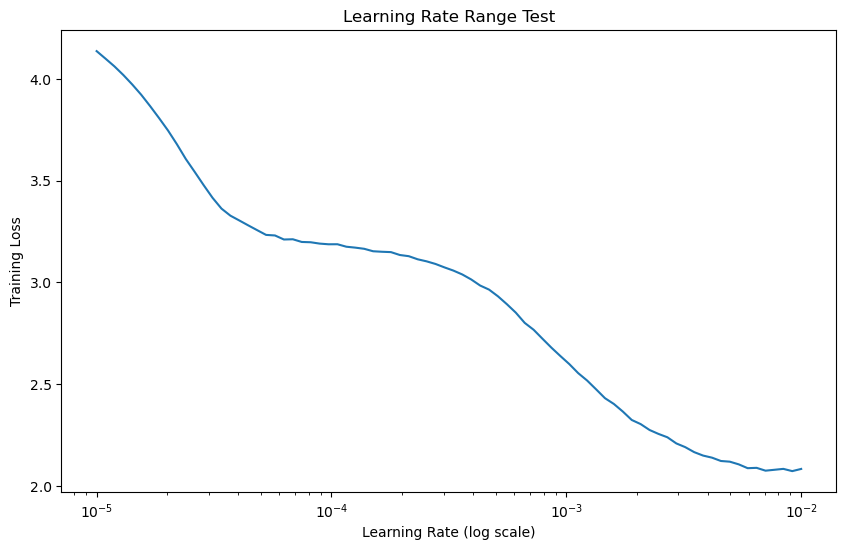

  0% 5/5000 [00:09<2:02:13,  1.47s/it] 

step 0: train loss 2.0474, val loss 2.2186


 20% 1005/5000 [00:45<34:48,  1.91it/s]

step 1000: train loss 1.9854, val loss 2.1560


 40% 2005/5000 [01:21<26:26,  1.89it/s]

step 2000: train loss 1.9463, val loss 2.1317


 60% 3005/5000 [01:58<17:23,  1.91it/s]

step 3000: train loss 1.9451, val loss 2.1107


 80% 4005/5000 [02:34<08:52,  1.87it/s]

step 4000: train loss 1.9077, val loss 2.0911


100% 5000/5000 [03:10<00:00, 26.25it/s]

step 4999: train loss 1.9084, val loss 2.0958


weres.

COMEO:
Sief Rortiag,
Wim, you he,
Yhe Vonjand renes ofcm in you. I
E EDWielw Me:wes and ale yoa,
I kevarduy vill dever.
-other Richou dencessen tryar!
That what I diek
Feles much or hen,
Thes ill hases.

ROMIO:
Nom, whepencn you!

LoRKowS:
Sownon, have hus ancifnow, garss.

GLOUCESTER:
Sis it your what now! and met.

SORK CIA:
Yole you, and andecr'd exting onacend it? goor han that agchy on Hercens of one deatenebkes;
But, andonion's good the carce a nxpours in the weep on ould.

CHARWIOOI AUE
YO:
Whalkionneed heners.

QUEEN:
ChARD:
What mad it
Enecland you,
Aor I say not the wirdt of bowake mearvy brownest wing whalt in anom him windeniely then, hornd,
Selbanerv hoary.

KING HENRY VI:
Is I so Hear't, of yoa seetifes night of here to ofone.

CAUCHICK:
It huteilst the binderf; jeow whe eyequstim instend!
Or not!
Burs higensencs.

CORIOLANUS:
Pert the dight-ion the to may do you, Elde thould your dcepes onfe me.

GLOR
RSICHICK:
Taspair me wrow of my navenmen, and lan;
So but my g

In [20]:

model = m_c

train_data, val_data = train_char_data, val_char_data
learning_rate = calculate_best_lr(model, torch.optim.AdamW(model.parameters()))

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# for iter in range(max_iters): 
for iter in tqdm(range(max_iters)):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, block_size), dtype=torch.long, device=device) + torch.tensor(syllab_encoder(" ")).to(device) 
print(char_decoder(model.generate(context, max_new_tokens=3000)[0].tolist()))

del(model)

**Purpose**:
- Similar to the previous cell, this trains the model using the char-based tokenizer (`m_c`) and generates text from it.

**Changes from the Previous Cell**:
1. **Model Selection**:
   - The char-based model (`m_c`) is now used.

2. **Dataset**:
   - Works with `train_char_data` and `val_char_data` (char-tokenized datasets).

3. **Encoding/Decoding for Text Generation**:
   - Uses `encode_char` and `decode_char` to work with the char tokenizer’s input/output format.

**Functionality**:
- Allows the model to train on tokenized sequences.
- Outputs text generated by a model trained on a preprocessed (char-tokenized) dataset.

#### Results of the learning rate test
- Step 0/80: LR=1.0e-05, Loss=4.1366
- Step 10/80: LR=2.4e-05, Loss=3.6065
- Step 20/80: LR=5.7e-05, Loss=3.2308
- Step 30/80: LR=1.4e-04, Loss=3.1653
- Step 40/80: LR=3.3e-04, Loss=3.0582
- Step 50/80: LR=7.9e-04, Loss=2.7229
- Step 60/80: LR=1.9e-03, Loss=2.3242
- Step 70/80: LR=4.6e-03, Loss=2.1226

The best result in loss was obtained with a learning rate equal to: 9.2e-03
<p> In the following image it is possible to see the pattern of the loss varying the learning rate: <br><br> <img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src = "https://drive.google.com/thumbnail?id=1yAwzHSLMvutDvehQm2QJf1d60Suw150N&sz=w1000"></p>
<p style="text-align:center">Char Tokenizer's Simple Feed Forward model loss by Learning Rate</p>

### Results of the training and validation loss
Here are shown the results of the training and validation loss for the Char tokenizer's Simple Feed Forward model obtained using the best learning rate:
- 0% 5/5000 [00:09<2:02:13,  1.47s/it] 
    - step 0: train loss 2.0474, val loss 2.2186
- 20% 1005/5000 [00:45<34:48,  1.91it/s]
    - step 1000: train loss 1.9854, val loss 2.1560
- 40% 2005/5000 [01:21<26:26,  1.89it/s]
    - step 2000: train loss 1.9463, val loss 2.1317
- 60% 3005/5000 [01:58<17:23,  1.91it/s]
    - step 3000: train loss 1.9451, val loss 2.1107
- 80% 4005/5000 [02:34<08:52,  1.87it/s]
    - step 4000: train loss 1.9077, val loss 2.0911
- 100% 5000/5000 [03:10<00:00, 26.25it/s]
    - step 4999: train loss 1.9084, val loss 2.0958

Running Learning Rate Range Test...
Step 0/80: LR=1.0e-05, Loss=9.4185
Step 10/80: LR=2.4e-05, Loss=8.8616
Step 20/80: LR=5.7e-05, Loss=7.1875
Step 30/80: LR=1.4e-04, Loss=6.5913
Step 40/80: LR=3.3e-04, Loss=6.4454
Step 50/80: LR=7.9e-04, Loss=6.1964
Step 60/80: LR=1.9e-03, Loss=5.8043
Step 70/80: LR=4.6e-03, Loss=5.4938
Best LR: 7.0e-03


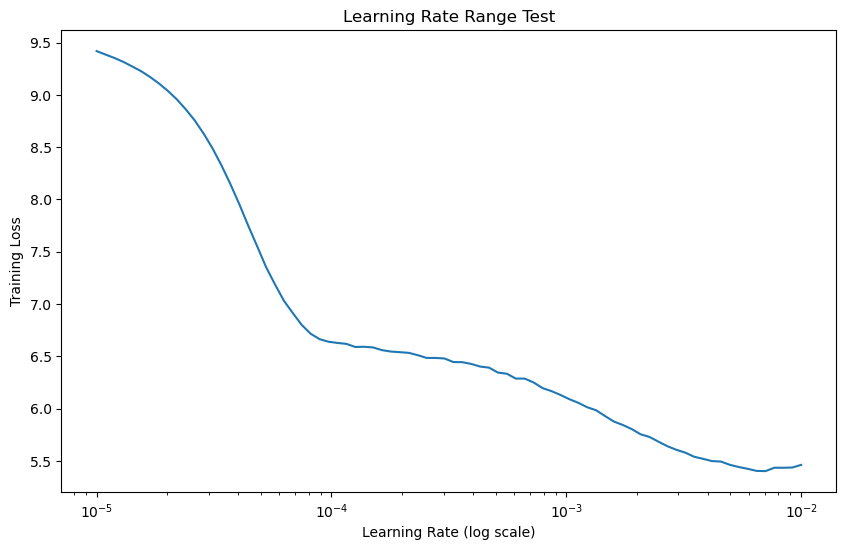

  0% 5/5000 [00:09<2:02:51,  1.48s/it] 

step 0: train loss 5.3371, val loss 7.1836


 20% 1005/5000 [00:46<35:52,  1.86it/s]

step 1000: train loss 4.1422, val loss 7.6089


 40% 2005/5000 [01:22<26:55,  1.85it/s]

step 2000: train loss 3.7116, val loss 7.8701


 60% 3005/5000 [01:58<17:56,  1.85it/s]

step 3000: train loss 3.5086, val loss 8.0315


 80% 4005/5000 [02:35<09:10,  1.81it/s]

step 4000: train loss 3.4013, val loss 8.2203


100% 5000/5000 [03:11<00:00, 26.12it/s]

step 4999: train loss 3.3290, val loss 8.3099


--
Was do before.

POLIXENES:
A guest caught me: not they can live.
If with a oath run aolar' restrain.
And when thou edge of prayers: were funt itself, I am not, you virtue
and myTell her, 'tw strong made.

Provost:
First, I must do live,
And wh deeds, a, it's beseech out:
And with his fair part have think which more,
If set me like the state; he prove that
The chiefge hath toured of the tomb of Bianose use
 wast is she; mild lies? youthfulal you is!
VDo myself with her, O:
O, you how none, if you may be distra' the Lady good,
How I am bad; while into well and made us.
3 KING HENRY VI

MENEN Senator mis:
My lord,
To-m maj comfort; why, here set the gentleman;
And for a wild moved'd upon thy sword,
And more run-d fearless beg m givechcharged,
But know the guilt.rown from th same own!
aying useoth down and shall wrfortune hear thy tongue!
The cousin stand,es:
How should bearest hollow have mine will keep'd to:
And to vengeance a toy and spilling and thy honour,
Or seem not arm winters w

In [21]:
model = m_t

train_data, val_data = train_t_data, val_t_data
learning_rate = calculate_best_lr(model, torch.optim.AdamW(model.parameters()))

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# for iter in range(max_iters): 
for iter in tqdm(range(max_iters)):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, block_size), dtype=torch.long, device=device) + torch.tensor(encode_tiktoken(" ")).to(device)
print(decode_tiktoken(model.generate(context, max_new_tokens=3000)[0].tolist()))

del(model)

**Purpose**:
- Similar to the previous cell, this trains the model using the tiktoken-based tokenizer (`m_t`) and generates text from it.

**Changes from the Previous Cell**:
1. **Model Selection**:
   - The tiktoken-based model (`m_t`) is now used.

2. **Dataset**:
   - Works with `train_t_data` and `val_t_data` (tiktoken-tokenized datasets).

3. **Encoding/Decoding for Text Generation**:
   - Uses `encode_tiktoken` and `decode_tiktoken` to work with the tiktoken tokenizer’s input/output format.

**Functionality**:
- Allows the model to train on tokenized sequences in a format compatible with OpenAI tokenizers.
- Outputs text generated by a model trained on a preprocessed (tiktokenized) dataset.

#### Results of the learning rate test
- Step 0/80: LR=1.0e-05, Loss=9.4185
- Step 10/80: LR=2.4e-05, Loss=8.8616
- Step 20/80: LR=5.7e-05, Loss=7.1875
- Step 30/80: LR=1.4e-04, Loss=6.5913
- Step 40/80: LR=3.3e-04, Loss=6.4454
- Step 50/80: LR=7.9e-04, Loss=6.1964
- Step 60/80: LR=1.9e-03, Loss=5.8043
- Step 70/80: LR=4.6e-03, Loss=5.4938

The best result in loss was obtained with a learning rate equal to: 7.0e-03
<p> In the following image it is possible to see the pattern of the loss varying the learning rate: <br><br> <img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src = "https://drive.google.com/thumbnail?id=1Up4qppJiVq0KVNSp4feVJl-qhnwlT6wj&sz=w1000"></p>
<p style="text-align:center">TikToken Tokenizer's Simple Feed Forward model loss by Learning Rate</p>

### Results of the training and validation loss
Here are shown the results of the training and validation loss for the Char tokenizer's Simple Feed Forward model obtained using the best learning rate:
- 0% 5/5000 [00:09<2:02:51,  1.48s/it] 
    - step 0: train loss 5.3371, val loss 7.1836
- 20% 1005/5000 [00:46<35:52,  1.86it/s]
    - step 1000: train loss 4.1422, val loss 7.6089
- 40% 2005/5000 [01:22<26:55,  1.85it/s]
    - step 2000: train loss 3.7116, val loss 7.8701
- 60% 3005/5000 [01:58<17:56,  1.85it/s]
    - step 3000: train loss 3.5086, val loss 8.0315
- 80% 4005/5000 [02:35<09:10,  1.81it/s]
    - step 4000: train loss 3.4013, val loss 8.2203
- 100% 5000/5000 [03:11<00:00, 26.12it/s]
    - step 4999: train loss 3.3290, val loss 8.3099

## **GPT model**

In the next blocks there is the implementation of a simple GPT model that will be trained, as for the Simple Feed Forward models, on the three tokenizers, in order to find out how the loss is affected by the tokenizers.

In [22]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, max_len: int = 5000):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x.transpose(0, 1)
        x = x + self.pe[:x.size(0)]
        return x.transpose(0, 1)

**Purpose**:
- Implements sinusoidal positional encodings for Transformer models, as introduced in the original "Attention is All You Need" paper.

**How It Works**:
1. **Positional Signals**:
   - Computes unique sine and cosine values for every position in the sequence up to `max_len`.
   - Uses alternating sine (`0::2`) and cosine (`1::2`) functions along the embedding dimension (`d_model`).

2. **`register_buffer`**:
   - Registers the positional encodings (`pe`) as a non-learnable parameter (buffer) in the model. These values are not updated during training.

3. **Forward Function**:
   - Adds positional embeddings to the input embeddings (`x`) to inject sequence order information into the data.
   - Note: The input `x` must be transposed to match the dimension order expected by the positional encoding design.

**Output**:
- Returns input `x` enhanced with positional encodings to enable Transformer models to consider sequence order.

**Use Case**:
- Integrates sequence structure into models (like GPT) that lack inherent sequential information without explicit positional embeddings.

In [23]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key   = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        
        # Variable out of the comptation graph are buffers in Pytorch
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        # self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        # wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

**Purpose**:
- Implements a single head of the self-attention mechanism, which is essential for transformer models like GPT, enabling computation of contextualized embeddings by attending to related positions in the input sequence.

**How It Works**:
1. **Linear Projections**:
   - **Key (`k`)**, **Query (`q`)**, and **Value (`v`)** matrices are computed from the input `x` using fully connected layers.
   - These projections reduce the embedding dimension from `n_embd` to `head_size`, making computations more efficient.

2. **Attention Scores**:
   - Attention scores (`wei`) are computed as the dot product of the **query** (`q`) and **key** (`k`) matrices, scaled by the square root of the dimensionality (`math.sqrt(k.shape[-1])`).
   - The scaling ensures numerical stability by mitigating large dot product magnitudes.

3. **Causal Masking**:
   - The `tril` buffer contains a lower triangular matrix of 1s, maintaining causality by preventing attention to future tokens in the sequence.
   - **`masked_fill`** replaces attention scores with `-inf` where the mask is 0, ensuring softmax (which converts scores into probabilities) gives them zero weight.

4. **Softmax Normalization**:
   - Converts attention scores into probabilities using `F.softmax(wei, dim=-1)`. This ensures the sum of probabilities over all tokens in the sequence equals 1.

5. **Weighted Aggregation**:
   - Combines the values (`v`) using the computed attention probabilities (`wei @ v`) to produce the contextualized representation of each token.

**Output**:
- Contextualized embeddings of size `(batch_size, time_steps, head_size)`.

In [24]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd) # projection back into the residual pathway

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # we concatenate over the channels dimension
        out = self.proj(out)
        return out

**Purpose**:
- Extends single-head attention into **multi-head attention**, as proposed in the transformer architecture. This allows the model to simultaneously focus on multiple perspectives of the sequence.

**Steps**:
1. **Multi-Head Parallelism**:
   - Initializes multiple independent attention heads using the `Head` module. Each head focuses on different representations (e.g., meanings, positions) of the input data.

2. **Concatenation**:
   - Combines the outputs of all attention heads along the channel (embedding) dimension using `torch.cat`.

3. **Linear Projection**:
   - Projects the multi-head concatenated output back to the original embedding dimension (`n_embd`), ensuring compatibility with the subsequent network layers.

**Why Multi-Head Attention?**
- Attending to different areas of focus within a sequence simultaneously improves the model's ability to capture relationships between tokens.

**Output**:
- A tensor of size `(batch_size, time_steps, embedding_dim)` containing the multi-head aggregated attention outputs.

In [25]:
class FeedForward(nn.Module):
    """ a simple linear layer followed by a non-linearity """
    
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd), # projection back into the residual pathway
        )
        
    def forward(self, x):
        return self.net(x)

**Purpose**:
- Implements a fully connected feed-forward layer for position-wise processing of token embeddings. It applies non-linearity and dimensional transformations to improve modeling capacity.

**How It Works**:
1. **Layer Expansion**:
   - Expands the embedding size from `n_embd` to `4 * n_embd` to increase the model's capacity to process features.

2. **Non-Linearity**:
   - Applies a **ReLU** activation function to add non-linear decision boundaries.

3. **Layer Reduction**:
   - Projects back to the original embedding size (`n_embd`), ensuring compatibility with the multi-head attention output.

**Output**:
- Processes token embeddings independently for better feature extraction and outputs tensor with the same shape as the input.

In [26]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """
    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

**Purpose**:
- Implements a single **Transformer block**, consisting of:
  1. A **Multi-Head Attention** mechanism for communication between tokens.
  2. A **Feed-Forward Neural Network** for computation.
  3. **LayerNorm** and **Residual Connections** for stability and gradient flow.

**Key Design Elements**:
1. **Multi-Head Attention (`self.sa`)**:
   - Captures relationships between tokens within the sequence.

2. **Feed-Forward Component (`self.ffwd`)**:
   - Processes individual token embeddings position-wise after attention.

3. **Layer Normalization (`ln1`, `ln2`)**:
   - Stabilizes training by normalizing activations within layers, reducing the impact of exploding/vanishing gradients.

4. **Residual Connections**:
   - Adds the input back to the output of each sub-layer (`x = x + ...`) to allow unobstructed gradient flow during backpropagation.

**Output**:
- Returns a processed tensor of the same shape as the input `(batch_size, time_steps, embedding_dim)`.

**Building Blocks**:
- This is the fundamental repeating unit of the Transformer and enables deep stacking of layers (e.g., in GPT models).

In [27]:
# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
n_embd = 384
n_head = 6
n_layer = 6
# ------------

In [28]:
class GPTLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        # self.rope = PositionalEncoding(n_embd, block_size)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        # x = self.rope(tok_emb)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

**Purpose**:
- Implements the full **GPT language model** for training and sequence generation.

**Detailed Breakdown**:
1. **Embedding Layers**:
   - **`self.token_embedding_table`**:
     - Learns a dense vector representation for each token in the vocabulary.
   - **`self.position_embedding_table`**:
     - Adds positional information to the tokens (required since Transformers are inherently position-agnostic).

2. **Transformer Blocks**:
   - **`self.blocks`**:
     - A stack of `n_layer` instances of the previously defined `Block` module.
     - These blocks perform self-attention and coordinate computation at each layer.

3. **Layer Normalization**:
   - **`self.ln_f`** provides stability in training, reducing internal covariate shift by normalizing embeddings before output.

4. **Vocabulary Projection**:
   - **`self.lm_head`** projects the final embedding space (`n_embd`) back to the vocabulary space (`vocab_size`). This provides logits over the vocabulary for token prediction.

5. **Forward Pass**:
   - Combines the token and position embeddings.
   - Passes the combined input sequentially through the transformer blocks.
   - Optionally computes a **cross-entropy loss** against target labels during training.

6. **Text Generation**:
   - Implements autoregressive text generation by iteratively predicting and appending the next token.

**Output**:
- **`logits`**: Prediction scores over the vocabulary for each token in the sequence.
- **`loss`** (optional): Cross-entropy loss between the predicted and target tokens.
- In generation mode, returns a sequence of generated tokens.

In [29]:
train_char_data, val_char_data, train_syllab_data, val_syllab_data, train_t_data, val_t_data, vocab_size_syllabs = create_datasets(text)

8589


In [30]:
model_chars = GPTLanguageModel(vocab_size_chars)
m_c = model_chars.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m_c.parameters())/1e6, 'M parameters')

model_syllabs = GPTLanguageModel(vocab_size_syllabs)
m_s = model_syllabs.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m_s.parameters())/1e6, 'M parameters')

model_t = GPTLanguageModel(vocab_size_tiktoken)
m_t = model_t.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m_t.parameters())/1e6, 'M parameters')

10.788929 M parameters
17.343885 M parameters
20.052303 M parameters


### **Purpose**:

1. **Model Initialization**:
   - This code initializes three distinct variants of the `GPTLanguageModel`, where each model is fine-tuned for a specific tokenization strategy:
     - **`model_chars`**: Character-level tokenization.
     - **`model_syllabs`**: Syllable-level tokenization.
     - **`model_t`**: Tiktoken-based tokenization.
   - Each model uses the respective vocabulary size as the key distinguishing parameter, which directly impacts the final embedding and projection layers' size.

2. **Device Assignment**:
   - Each model is moved to the computing device (CPU, GPU, or Apple Silicon), as determined earlier in the script (`device = 'cuda', 'mps', or 'cpu'`).

3. **Parameter Count Display**:
   - For diagnostic and informational purposes, the total number of trainable parameters in each model is calculated and displayed in millions (M). This provides an insight into the model’s complexity.

### **How many parameters do the GPT models have ?**
- Char Tokenizer: 10.788929 Millions of parameters
- Syllable Tokenizer: 17.343885 Millions of parameters
- TikToken Tokenizer: 20.052303 Millions of parameters

### **Char Tokenizer GPT Model**

Running Learning Rate Range Test...
Step 0/80: LR=1.0e-05, Loss=3.2517
Step 10/80: LR=2.4e-05, Loss=2.3254
Step 20/80: LR=5.7e-05, Loss=1.8804
Step 30/80: LR=1.4e-04, Loss=1.6540
Step 40/80: LR=3.3e-04, Loss=1.5645
Step 50/80: LR=7.9e-04, Loss=1.4372
Step 60/80: LR=1.9e-03, Loss=1.4164
Step 70/80: LR=4.6e-03, Loss=2.2652
Best LR: 1.1e-03


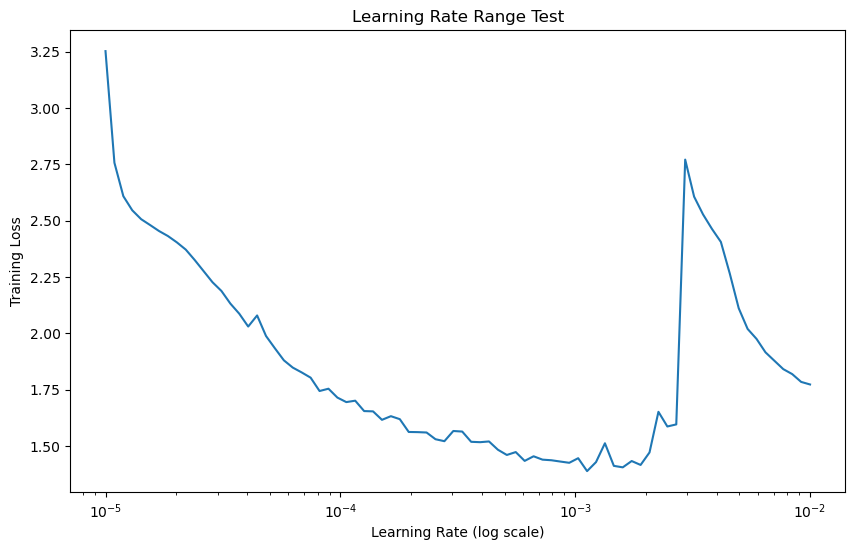

  0% 1/5000 [00:18<25:26:53, 18.33s/it]

step 0: train loss 1.7115, val loss 1.8930


 20% 1001/5000 [03:03<6:14:54,  5.63s/it]

step 1000: train loss 1.4569, val loss 1.7172


 40% 2001/5000 [05:49<4:41:26,  5.63s/it]

step 2000: train loss 1.3770, val loss 1.6894


 60% 3001/5000 [08:34<3:07:32,  5.63s/it]

step 3000: train loss 1.3236, val loss 1.6732


 80% 4001/5000 [11:20<1:33:43,  5.63s/it]

step 4000: train loss 1.2775, val loss 1.6796


100% 5000/5000 [14:05<00:00,  5.91it/s]  

step 4999: train loss 1.2413, val loss 1.6902



POMPEY:
You are ready, Froth, smooth, gap, are him about you: the
lexpur man, but you only poor none.

POMPEY:
Good me, or by year better.

POMPEY:
To you, and in the bergunkena business.

Clown:
friarly discalusion! were him; show thee, let us.

ABHORSON:
By care not what?

POMPEY:
Amen. The is not stand work!
Which for a solding a there balm; there to Julet,
O foottch ne'er of blachief amillo, thought well,
she nindly call'd envil of the day, good quicklocks. Thou not thee,
which wound it, she his with hand all
be without no use till I again,
But which with it on this great's foul calle,
Whilst make free-from her with fall unches yourself and.

BUSHY:
That Richard my son that my breath?

BUCKINGHAM:
Where sad-for a queen, You all I do thee.

KING RICHARD III:
A grey, my fatal the last:
Thy little Wal friend cries, has I guest:
And is you and deposed be the crept unto present the enemies
By the thou armble, on man.

KING RICHARD III:
Be know far to been Voloughought--

RATCLIFF:
Stan

In [31]:
model = m_c
train_data, val_data = train_char_data, val_char_data

learning_rate = calculate_best_lr(model, torch.optim.AdamW(model.parameters()))

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in tqdm(range(max_iters)):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(char_decoder(model.generate(context, max_new_tokens=3000)[0].tolist()))

del(model)

**Purpose**:
- Trains the GPT model using the character tokenizer and generates text after training.

**Key Steps**:
1. **Model Selection**:
   - Uses the character-tokenized dataset and the character-based feed-forward (`m_c`) model.

2. **Training Loop**:
   - Executes a loop for `max_iters` iterations, periodically evaluating training and validation losses.
   - Gradients are computed via **backpropagation** and updated through **AdamW optimization**.

3. **Text Generation**:
   - Once the training is complete, text is generated using the `model.generate()` function, starting from a blank context.

#### Results of the learning rate test
- Step 0/80: LR=1.0e-05, Loss=3.2517
- Step 10/80: LR=2.4e-05, Loss=2.3254
- Step 20/80: LR=5.7e-05, Loss=1.8804
- Step 30/80: LR=1.4e-04, Loss=1.6540
- Step 40/80: LR=3.3e-04, Loss=1.5645
- Step 50/80: LR=7.9e-04, Loss=1.4372
- Step 60/80: LR=1.9e-03, Loss=1.4164
- Step 70/80: LR=4.6e-03, Loss=2.2652

The best result in loss was obtained with a learning rate equal to: 1.1e-03
<p> In the following image it is possible to see the pattern of the loss varying the learning rate: <br><br> <img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src = "https://drive.google.com/thumbnail?id=1txmRfqrLIbdCY4ZRnQv9jCBv-8v6MW-C&sz=w1000"></p>
<p style="text-align:center">Char Tokenizer's Simple Feed Forward model loss by Learning Rate</p>

### Results of the training and validation loss
Here are shown the results of the training and validation loss for the Char tokenizer's GPT model obtained using the best learning rate:
- 0% 1/5000 [00:18<25:26:53, 18.33s/it]
    - step 0: train loss 1.7115, val loss 1.8930
- 20% 1001/5000 [03:03<6:14:54,  5.63s/it]
    - step 1000: train loss 1.4569, val loss 1.7172
- 40% 2001/5000 [05:49<4:41:26,  5.63s/it]
    - step 2000: train loss 1.3770, val loss 1.6894
- 60% 3001/5000 [08:34<3:07:32,  5.63s/it]
    - step 3000: train loss 1.3236, val loss 1.6732
- 80% 4001/5000 [11:20<1:33:43,  5.63s/it]
    - step 4000: train loss 1.2775, val loss 1.6796
- 100% 5000/5000 [14:05<00:00,  5.91it/s]  
    - step 4999: train loss 1.2413, val loss 1.6902

### **Syllable Tokenizer GPT Model**

Running Learning Rate Range Test...
Step 0/80: LR=1.0e-05, Loss=6.8256
Step 10/80: LR=2.4e-05, Loss=3.5010
Step 20/80: LR=5.7e-05, Loss=3.0352
Step 30/80: LR=1.4e-04, Loss=2.5006
Step 40/80: LR=3.3e-04, Loss=1.9261
Step 50/80: LR=7.9e-04, Loss=1.1324
Step 60/80: LR=1.9e-03, Loss=0.8741
Step 70/80: LR=4.6e-03, Loss=0.9590
Best LR: 6.5e-03


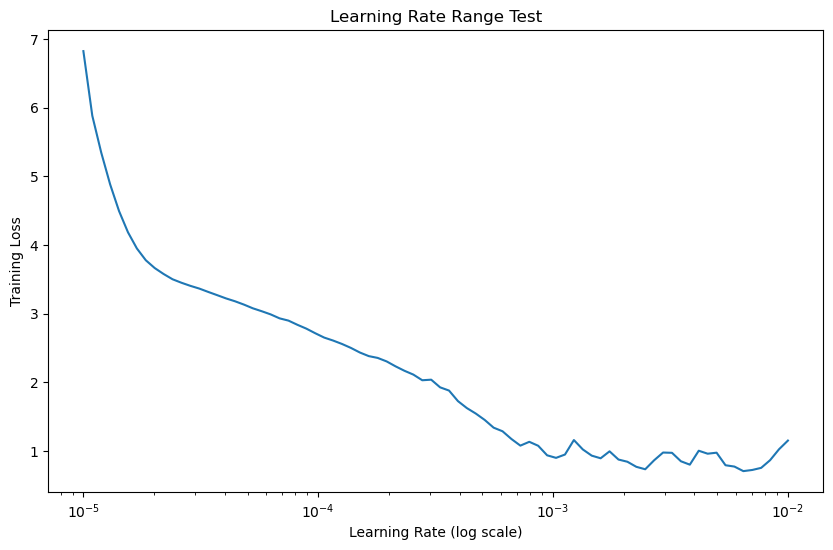

  0% 1/5000 [00:22<30:55:29, 22.27s/it]

step 0: train loss 0.4261, val loss 6.0724


 20% 1001/5000 [03:40<7:32:12,  6.78s/it]

step 1000: train loss 0.1610, val loss 7.7634


 40% 2001/5000 [06:59<5:39:24,  6.79s/it]

step 2000: train loss 0.1318, val loss 8.2928


 60% 3001/5000 [10:17<3:46:01,  6.78s/it]

step 3000: train loss 0.1187, val loss 8.2959


 80% 4001/5000 [13:35<1:53:04,  6.79s/it]

step 4000: train loss 0.1111, val loss 8.4369


100% 5000/5000 [16:53<00:00,  4.93it/s]  

step 4999: train loss 0.1034, val loss 8.6085


First Servingman:
friends: it was Mercutio too;
Who Lucio's information against me and we revenge,
And therefore we have revenge, we have remain
Hear our dear in the people.

Citizens:
The gods keep you sides, upon the way
To bear this way thereat home.

MENENIUS:
I'll bring it you must to him.

VOLUMNIA:
youth There's a soldier, or I am a courtier. Seest
cap-- of the court in these enfoldings?
hath not my gait in it the measure of the court?
receives not thy nose court-odor from me? rewards my king,
Where I with whom I from this palace? night? or how
The unkindness of harmty my heart's tender tree,
Exton her effeminate and mildly in my cheeks,
And be not in the hottest day prognostication
proclaimsed shall be set against a brick-wall, the
sun looking with a southward eye upon him, where he
is to behold him with flies blown to death. But what
talk we of these traitorly rascals, whose miseries
are to be smiled at, their offences being so
capital? Tell me, for you seem to be honest plain

In [32]:
model = m_s
train_data, val_data = train_syllab_data, val_syllab_data

learning_rate = calculate_best_lr(model, torch.optim.AdamW(model.parameters()))

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in tqdm(range(max_iters)):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(syllab_decoder(model.generate(context, max_new_tokens=3000)[0].tolist()))

del(model)

**Purpose**:
- Similar to the previous cell, but uses the **tiktoken tokenizer-based model (`m_s`)** and dataset.

#### Results of the learning rate test
- Step 0/80: LR=1.0e-05, Loss=6.8256
- Step 10/80: LR=2.4e-05, Loss=3.5010
- Step 20/80: LR=5.7e-05, Loss=3.0352
- Step 30/80: LR=1.4e-04, Loss=2.5006
- Step 40/80: LR=3.3e-04, Loss=1.9261
- Step 50/80: LR=7.9e-04, Loss=1.1324
- Step 60/80: LR=1.9e-03, Loss=0.8741
- Step 70/80: LR=4.6e-03, Loss=0.9590

The best result in loss was obtained with a learning rate equal to: 6.5e-03
<p> In the following image it is possible to see the pattern of the loss varying the learning rate: <br><br> <img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src = "https://drive.google.com/thumbnail?id=1Yd2AK9tL8y7IJqLPeSx6yuQNoEzBU4Zk&sz=w1000"></p>
<p style="text-align:center"> Syllable Tokenizer's Simple Feed Forward model loss by Learning Rate</p>

### Results of the training and validation loss
Here are shown the results of the training and validation loss for the Syllable tokenizer's GPT model obtained using the best learning rate:
- 0% 1/5000 [00:22<30:55:29, 22.27s/it]
    - step 0: train loss 0.4261, val loss 6.0724
- 20% 1001/5000 [03:40<7:32:12,  6.78s/it]
    - step 1000: train loss 0.1610, val loss 7.7634
- 40% 2001/5000 [06:59<5:39:24,  6.79s/it]
    - step 2000: train loss 0.1318, val loss 8.2928
- 60% 3001/5000 [10:17<3:46:01,  6.78s/it]
    - step 3000: train loss 0.1187, val loss 8.2959
- 80% 4001/5000 [13:35<1:53:04,  6.79s/it]
    - step 4000: train loss 0.1111, val loss 8.4369
- 100% 5000/5000 [16:53<00:00,  4.93it/s]  
    - step 4999: train loss 0.1034, val loss 8.6085

### **Tiktoken Tokenizer GPT Model**

Running Learning Rate Range Test...
Step 0/80: LR=1.0e-05, Loss=8.7957
Step 10/80: LR=2.4e-05, Loss=5.3202
Step 20/80: LR=5.7e-05, Loss=4.2890
Step 30/80: LR=1.4e-04, Loss=3.2437
Step 40/80: LR=3.3e-04, Loss=1.3042
Step 50/80: LR=7.9e-04, Loss=0.5696
Step 60/80: LR=1.9e-03, Loss=0.5881
Step 70/80: LR=4.6e-03, Loss=0.5511
Best LR: 7.7e-03


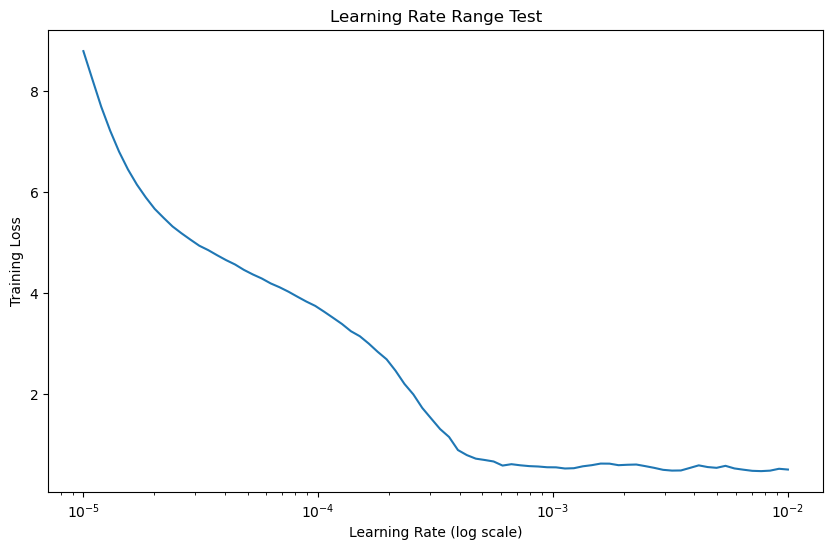

  0% 1/5000 [00:23<33:13:43, 23.93s/it]

step 0: train loss 0.2973, val loss 12.3084


 20% 1001/5000 [03:55<8:06:30,  7.30s/it]

step 1000: train loss 0.1751, val loss 14.5075


 40% 2001/5000 [07:26<6:06:03,  7.32s/it]

step 2000: train loss 0.1390, val loss 14.6008


 60% 3001/5000 [10:57<4:03:57,  7.32s/it]

step 3000: train loss 0.1233, val loss 15.7472


 80% 4001/5000 [14:29<2:02:18,  7.35s/it]

step 4000: train loss 0.1142, val loss 15.1887


100% 5000/5000 [18:00<00:00,  4.63it/s]  

step 4999: train loss 0.1078, val loss 15.2956


! at fear.
Now, dear nurse, or wits hast hour!
Where is the county, I have done to my page;
He has that raised the watch?
Sirrah, what hast thou oft provokest; yet I have them?

RUTLAND:
I take it, you'st before it, boy;
For that name brave Elbow's child, that he hath made me blame him
thee; and
entleisure have discredited to him, and now is he
resolved to die.

ESCALUS:
You have paid the heavens your function, and the
prisoner the very debt of your calling. I have
laboured for the poor gentleman to the extremest
shore of my modesty: but my brother justice have I
found so severe, that he hath forced me to tell him
he is indeed Justice.

DUKE VINCENTIO:
If his own life answer the straitness of his
proceeding, it shall become him well; wherein if he
chance to fail, he hath sentenced himself.

ESCALUS:
I am going to visit the prisoner. Fare you well.

DUKE VINCENTIO:
Peace be with you!
He who the sword of heaven will bear
Cut off and course of justice,--

MARIANA:
By such words,
As that I

In [33]:
model = m_t
train_data, val_data = train_t_data, val_t_data

learning_rate = calculate_best_lr(model, torch.optim.AdamW(model.parameters()))

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


for iter in tqdm(range(max_iters)):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode_tiktoken(model.generate(context, max_new_tokens=3000)[0].tolist()))

del(model)

**Purpose**:
- Similar to the previous cell, but uses the **tiktoken tokenizer-based model (`m_t`)** and dataset.

#### **Results of the learning rate test**
- Step 0/80: LR=1.0e-05, Loss=8.7957
- Step 10/80: LR=2.4e-05, Loss=5.3202
- Step 20/80: LR=5.7e-05, Loss=4.2890
- Step 30/80: LR=1.4e-04, Loss=3.2437
- Step 40/80: LR=3.3e-04, Loss=1.3042
- Step 50/80: LR=7.9e-04, Loss=0.5696
- Step 60/80: LR=1.9e-03, Loss=0.5881
- Step 70/80: LR=4.6e-03, Loss=0.5511

The best result in loss was obtained with a learning rate equal to: 7.7e-03
<p> In the following image it is possible to see the pattern of the loss varying the learning rate: <br><br> <img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src = "https://drive.google.com/thumbnail?id=15vuERom2WpkdiGxnrTkt7zOyjYuUyUeX&sz=w1000"></p>
<p style="text-align:center">TikToken Tokenizer's Simple Feed Forward model loss by Learning Rate</p>

### **Results of the training and validation loss**
Here are shown the results of the training and validation loss for the TikToken tokenizer's Simple Feed Forward model obtained using the best learning rate:
- 0% 1/5000 [00:23<33:13:43, 23.93s/it]
    - step 0: train loss 0.2973, val loss 12.3084
- 20% 1001/5000 [03:55<8:06:30,  7.30s/it]
    - step 1000: train loss 0.1751, val loss 14.5075
- 40% 2001/5000 [07:26<6:06:03,  7.32s/it]
    - step 2000: train loss 0.1390, val loss 14.6008
- 60% 3001/5000 [10:57<4:03:57,  7.32s/it]
    - step 3000: train loss 0.1233, val loss 15.7472
- 80% 4001/5000 [14:29<2:02:18,  7.35s/it]
    - step 4000: train loss 0.1142, val loss 15.1887
- 100% 5000/5000 [18:00<00:00,  4.63it/s]  
    - step 4999: train loss 0.1078, val loss 15.2956

## **Conclusions**

**The results of our project show that the capacity of our models to generate coherent text, is strictly dependant upon the number of parameters.**

**Given the same number of parameters, the best performing model is the one with the greatest capacity to overfit.**

**Furthermore, increasing the embedding matrix and with it the number of parameters did not yield significant improvements as our network are not complex enough to take advantage of the detailed representation of the embedding matrix, while the computational cost increased significantly with respect to the performance.**

---

In this section are reported the conclusion of this project over the losses found in the data

The first step is write all the data obtained in a cell in order to plot the results

In [34]:
# SFF losses
sff_syllable_train = [3.4162, 2.9705, 2.8466, 2.7820, 2.7182, 2.6774]
sff_syllable_val = [4.0534, 3.8205, 3.8582, 3.8791, 3.8997, 3.9122]

sff_char_train = [2.0474, 1.9854, 1.9463, 1.9451, 1.9077, 1.9084]
sff_char_val = [2.2186, 2.1560, 2.1317, 2.1107, 2.0911, 2.0958]

sff_tiktoken_train = [5.3371, 4.1422, 3.7116, 3.5086, 3.4013, 3.3290]
sff_tiktoken_val = [7.1836, 7.6089, 7.8701, 8.0315, 8.2203, 8.3099]

# GPT losses
gpt_char_train = [1.7115, 1.4569, 1.3770, 1.3236, 1.2775, 1.2413]
gpt_char_val = [1.8930, 1.7172, 1.6894, 1.6732, 1.6796, 1.6902]

gpt_syllable_train = [0.4261, 0.1610, 0.1318, 0.1187, 0.1111, 0.1034]
gpt_syllable_val = [6.0724, 7.7634, 8.2928, 8.2959, 8.4369, 8.6085]

gpt_tiktoken_train = [0.2973, 0.1751, 0.1390, 0.1233, 0.1142, 0.1078]
gpt_tiktoken_val = [12.3084, 14.5075, 14.6008, 15.7472, 15.1887, 15.2956]


In the next cell the function to plot the results is defined: it takes as arguments a list of results (Therefore, a list of list of numbers) a parameter `Sff` used to select the colors in order to give to the model and tokenizer the same color every time, another parameter `SFFandGPT` which serves the same purpose. unlocking the full range of colors in case there are all the models and a title for the plot (optional). It outputs a plot of the values.

This function can be used to create different plots to show different conclusions

In [35]:
import matplotlib.pyplot as plt
colors = ["#87CEFA","#1E90FF","#4682B4","#00FA9A","#228B22","#2E8B57"]
epochs = [0,1000,2000,3000,4000,5000]
tokenizers = ["char","syllable","tiktoken"]
def plot_results(results: list, Sff:bool, SFFandGPT: bool, title = "Plot of results"):
    """
        Arguments:
            results: list containing lists of values to plot (one list = one plot).

            Sff: boolean value used to select colors. Set to True if values of Simple Feed Forward model are passed.

            SFFandGPT: boolean value used to select colors. Set to True if values for Simple Feed Forward and GPT models are passed.

            title: string containing the title of the plot.
    """
    plt.figure(figsize=(10, 6))
    toknzrs=[]
    if SFFandGPT:
        for model_name in ["SFF","GPT"]:
            for tokenizer_name in tokenizers:
                toknzrs.append(model_name+" "+tokenizer_name)
    else:
        toknzrs = tokenizers
    res_len = len(results)
    plot_colors = colors
    if Sff and not SFFandGPT:
        plot_colors = plot_colors[:3]
    elif not Sff and not SFFandGPT:
        plot_colors = plot_colors[3:]
    for i in range(res_len):
        plt.plot(epochs,results[i], c = plot_colors[i], label=toknzrs[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.show()

## **Simple Feed Forward models losses**

In this section it is possible to see the results of train and validation loss of the Simple Feed Forward models.

The following cell contains the data that will be plotted.

In [ ]:
sff_train_losses = [
    sff_char_train,
    sff_syllable_train,
    sff_tiktoken_train
]

sff_val_losses = [
    sff_char_val,
    sff_syllable_val,
    sff_tiktoken_val,
]

### Simple Feed Forward Train Losses

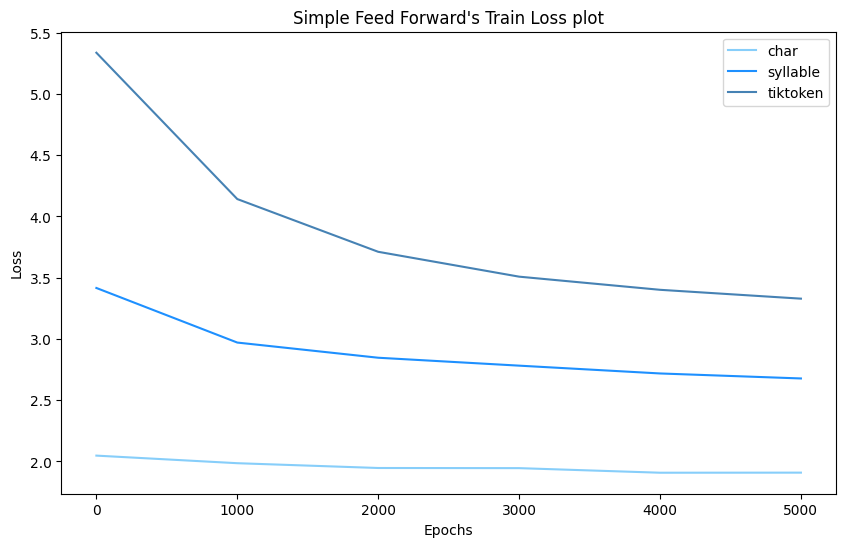

In [ ]:
plot_results(sff_train_losses,True,False,"Simple Feed Forward's Train Loss plot")

As it is possible to see from the image above, The char tokenizer's model is the one that reaches the minimum train loss. This is due to the fact that that model has the least amount of parameters, 0.02636 Millions, which makes it 99 times smaller than the syllable tokenizer's model and almost 140 times smaller than the Tiktoken tokenizer's model. The syllable tokenizer's model, having only 1.4 times less parameters than the Tiktoken one, sits right between the other two train losses.

Having less parameters to tune makes the Char Tokenizer model the best in terms of training loss, since the amount of data given to the models is the same and it is almost certainly not enough.

With further training, it could happen that Syllable and Tiktoken tokenizers' models reach the same or even better performances.

### Simple Feed Forward Validation Losses

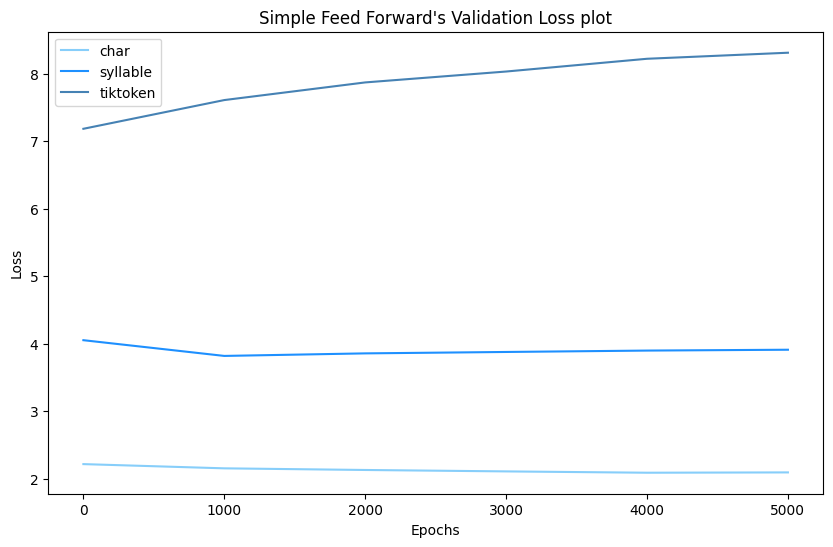

In [ ]:
plot_results(sff_val_losses,True,False,"Simple Feed Forward's Validation Loss plot")

- Char tokenizer's model is the one with the smaller validation loss plot. It is also the only that seems to decrease with increasing amount of steps, which means that it doesn't overfit.

- Syllable tokenizers's model is right between the other two plots, slightly closer to the char's plot. It shows a behaviour that is a midway between the other two models: it linearly decreases, like the Char model, until the steps 1000 when it starts to slowly increase, like the tiktoken model, showing an overfitting behaviour of the model.

- Tiktoken tokenizer's model sits well above the other two models. It shows an almost logarithimic increase, which is a clear sign of overfitting of the model.

As for the train losses, it is clear to see that the amount of data used to train the models is not enough to increase the performance of the model and therefore decrease both train and validation losses when there are large models like the syllable and tiktoken ones.

The increase in validation loss for the bigger models was expected because the same data was used over and over to train the models, instead of giving them new data. This was a choice made at the beginning of the project, since the original idea was to obtain a model capable of generating Shakespearean sentences.

### Text Generated by Simple Feed Forward models by tokenizer
<table>
<tr>
<td>
    Char
</td>
<td>
    Syllable
</td>
<td>
    TikToken
</td>
</tr>
<tr>
<td>
weres.

COMEO:
Sief Rortiag,
Wim, you he,
Yhe Vonjand renes ofcm in you. I
E EDWielw Me:wes and ale yoa,
I kevarduy vill dever.
-other Richou dencessen tryar!
That what I diek
Feles much or hen,
Thes ill hases.

ROMIO:
Nom, whepencn you!

LoRKowS:
Sownon, have hus ancifnow, garss.

GLOUCESTER:
Sis it your what now! and met.

SORK CIA:
Yole you, and andecr'd exting onacend it? goor han that agchy on Hercens of one deatenebkes;
But, andonion's good the carce a nxpours in the weep on ould.

CHARWIOOI AUE
YO:
Whalkionneed heners.

QUEEN:
ChARD:
What mad it
Enecland you,
Aor I say not the wirdt of bowake mearvy brownest wing whalt in anom him windeniely then, hornd,
Selbanerv hoary.

KING HENRY VI:
Is I so Hear't, of yoa seetifes night of here to ofone.

CAUCHICK:
It huteilst the binderf; jeow whe eyequstim instend!
Or not!
Burs higensencs.

CORIOLANUS:
Pert the dight-ion the to may do you, Elde thould your dcepes onfe me.

GLOR
RSICHICK:
Taspair me wrow of my navenmen, and lan;
So but my g
</td>
<td>
cluson, which will'in low.

FRIAR LAURENCE:
Hold he,
And cost.
O, to thee to Rome,
For he, nor the guest: whether if that all no?

LUCIO: Hortson low boy: and am place.

AEdile:
Here, trumcome. Come,
I bear thy litence for this love.

ISABELLAassd damn'd goodsaulti
Rather till bad arm and with this fool.
Who, by you bless, both me preport,
When to him, my sovereign,
Must both our me to bub use you' the pleasous violuIspirUnday before thy hath no tentideed upbles, such premorsidoncles and but to Juliet, repair,
Long being morIsland durst:
If now, grief hast, came come, the rest-favour who, son; come to Plashyurest so't.

BUSHY:
There's trely er poilo!
Why lives stood muster heself, kiss me to Juliet mine process,
Scar, madam are a corse,
That I am slain again.

LADY ANNE:
Now eiblow thee upon, may Richard, Fear I, Is my sight?

LADY
Of my time, studyabel these your soul
rah, are premii'd of
As go enoughly from heren, be partly hanhold.

BENVOLIO:
How her have ' avenged?

Second Servizen
</td>
<td>
Was do before.

POLIXENES:
A guest caught me: not they can live.
If with a oath run aolar' restrain.
And when thou edge of prayers: were funt itself, I am not, you virtue
and myTell her, 'tw strong made.

Provost:
First, I must do live,
And wh deeds, a, it's beseech out:
And with his fair part have think which more,
If set me like the state; he prove that
The chiefge hath toured of the tomb of Bianose use
 wast is she; mild lies? youthfulal you is!
VDo myself with her, O:
O, you how none, if you may be distra' the Lady good,
How I am bad; while into well and made us.
3 KING HENRY VI

MENEN Senator mis:
My lord,
To-m maj comfort; why, here set the gentleman;
And for a wild moved'd upon thy sword,
And more run-d fearless beg m givechcharged,
But know the guilt.rown from th same own!
aying useoth down and shall wrfortune hear thy tongue!
The cousin stand,es:
How should bearest hollow have mine will keep'd to:
And to vengeance a toy and spilling and thy honour,
Or seem not arm winters wToa
</td>
</tr>
</table>

Comparing the first 1000 characters of the generated text by each Simple Feed Forward model, it is possible to see that even if the Char Tokenizer's model is the one with the lowest train loss, its output is visibly poorer grammatically, syntactically and sensibly, than the other two models. This is due to the fact that the tokens of the model are single characters, therefore the objective of the neural network is to predict the next character, which is more difficult if the final objective is obtain good sentences. More in detail:

- The Char tokenizer's model provides a good format for a play. The names are sometimes good like "KING HENRY VI" but mostly bad like "GLOR
RSICHICK". The text is not sensible since there are very few sensible words.

- The Syllable tokenizer's model provides sensible names and more sensible words than the Char one, but the sentences are still not sensible.

- The Tiktoken tokenizer's model provides sensible names and more sensible words than the Syllable one, providing in the end some short sensible sentences.

However, in all three cases most of the text is incorrect, from a human readibility perspective.

## **GPT models losses**

In this section it is possible to see the results of train and validation loss of the GPT models.

The following cell contains the data that will be plotted.

In [ ]:
gpt_train_losses = [
    gpt_char_train,
    gpt_syllable_train,
    gpt_tiktoken_train,
]
gpt_val_losses = [
    gpt_char_val,
    gpt_syllable_val,
    gpt_tiktoken_val
]

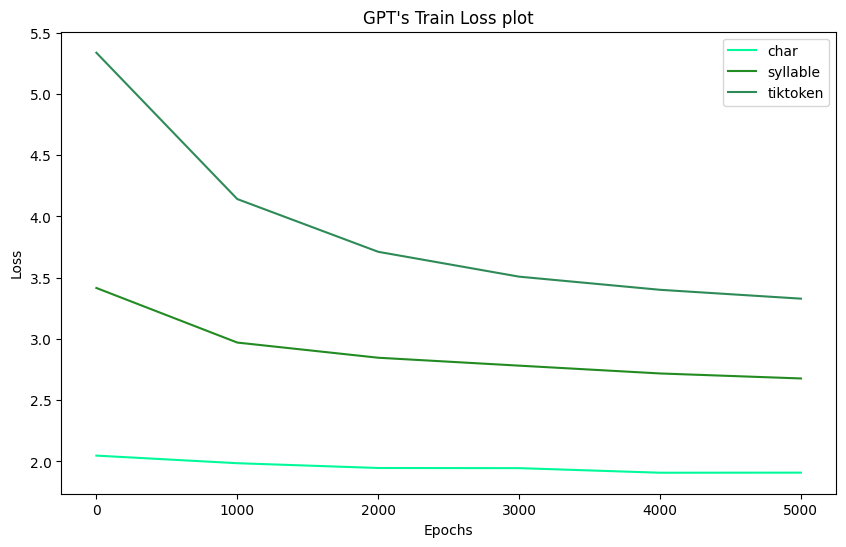

In [ ]:
plot_results(sff_train_losses,False,False,"GPT's Train Loss plot")

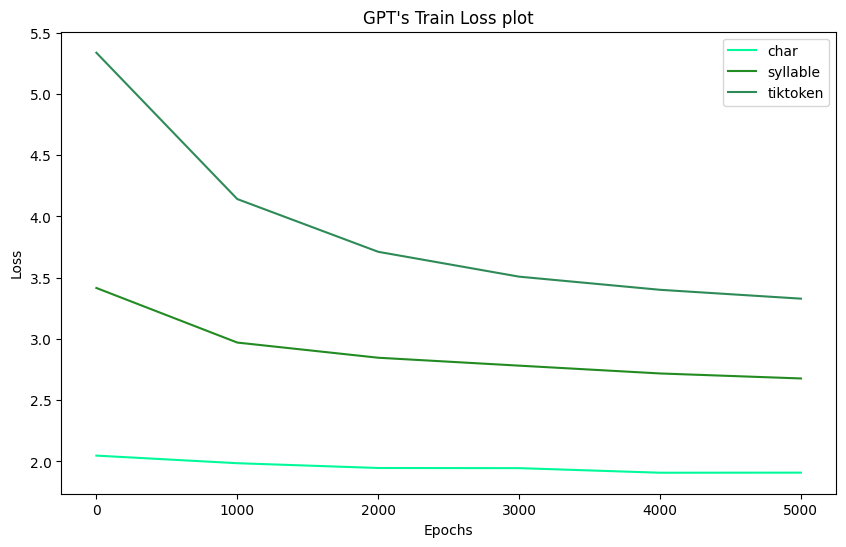

In [ ]:
plot_results(sff_train_losses,False,False,"GPT's Train Loss plot")

### Text Generated by GPT models by tokenizer


<table>
<tr>
<td>
    Char
</td>
<td>
    Syllable
</td>
<td>
    TikToken
</td>
</tr>
<tr>
<td>
POMPEY:
You are ready, Froth, smooth, gap, are him about you: the
lexpur man, but you only poor none.

POMPEY:
Good me, or by year better.

POMPEY:
To you, and in the bergunkena business.

Clown:
friarly discalusion! were him; show thee, let us.

ABHORSON:
By care not what?

POMPEY:
Amen. The is not stand work!
Which for a solding a there balm; there to Julet,
O foottch ne'er of blachief amillo, thought well,
she nindly call'd envil of the day, good quicklocks. Thou not thee,
which wound it, she his with hand all
be without no use till I again,
But which with it on this great's foul calle,
Whilst make free-from her with fall unches yourself and.

BUSHY:
That Richard my son that my breath?

BUCKINGHAM:
Where sad-for a queen, You all I do thee.

KING RICHARD III:
A grey, my fatal the last:
Thy little Wal friend cries, has I guest:
And is you and deposed be the crept unto present the enemies
By the thou armble, on man.

KING RICHARD III:
Be know far to been Voloughought--

RATCLIFF:
Stand
</td>
<td>
First Servingman:
friends: it was Mercutio too;
Who Lucio's information against me and we revenge,
And therefore we have revenge, we have remain
Hear our dear in the people.

Citizens:
The gods keep you sides, upon the way
To bear this way thereat home.

MENENIUS:
I'll bring it you must to him.

VOLUMNIA:
youth There's a soldier, or I am a courtier. Seest
cap-- of the court in these enfoldings?
hath not my gait in it the measure of the court?
receives not thy nose court-odor from me? rewards my king,
Where I with whom I from this palace? night? or how
The unkindness of harmty my heart's tender tree,
Exton her effeminate and mildly in my cheeks,
And be not in the hottest day prognostication
proclaimsed shall be set against a brick-wall, the
sun looking with a southward eye upon him, where he
is to behold him with flies blown to death. But what
talk we of these traitorly rascals, whose miseries
are to be smiled at, their offences being so
capital? Tell me, for you seem to be honest plain
</td>
<td>
! at fear.
Now, dear nurse, or wits hast hour!
Where is the county, I have done to my page;
He has that raised the watch?
Sirrah, what hast thou oft provokest; yet I have them?

RUTLAND:
I take it, you'st before it, boy;
For that name brave Elbow's child, that he hath made me blame him
thee; and
entleisure have discredited to him, and now is he
resolved to die.

ESCALUS:
You have paid the heavens your function, and the
prisoner the very debt of your calling. I have
laboured for the poor gentleman to the extremest
shore of my modesty: but my brother justice have I
found so severe, that he hath forced me to tell him
he is indeed Justice.

DUKE VINCENTIO:
If his own life answer the straitness of his
proceeding, it shall become him well; wherein if he
chance to fail, he hath sentenced himself.

ESCALUS:
I am going to visit the prisoner. Fare you well.

DUKE VINCENTIO:
Peace be with you!
He who the sword of heaven will bear
Cut off and course of justice,--

MARIANA:
By such words,
As that I
</td>
</tr>
</table>

Comparing the first 1000 characters of the generated text by each GPT model, it is possible to see that by utilizing the GPT model, the performances in generated text, from a human perspective, is greatly increased. Now all three models produce more sensible names, more sensible words and more or less sensible sentences, depending on the model, with respect to the simple feed forward model. In detail:

- The Char tokenizer's model provides a good format for a play. Now the names of the characters are sensible in almost every case, even if they may be different from the names in the plays. There are many more sensible words, but even short sequences of words are completely out of sense, other than syntactically wrong. The improvement from the Simple Feed Forward model is in the generation of sensible and grammatically correct words.

- The Syllable tokenizer's model provides sensible names and even more sensible words than the Char one. Now most of the words are grammatically correct. Some small sequences of words or even sentences are both syntactally and sensibly formulated, like "It was Mercutio too", which not only respects the first character of the sentence in upper-case format rule, but also the first character of the character's name in upper-case format rule. However, there are still many sentences that are not sensible nor in the general talk of the character, nor by themselves.

- The Tiktoken tokenizer's model provides all sensible character's names and also sensible sentences. In some cases, it also provides sentences that make sense in the whole context of a character, like in the first talk of "ESCALUS", in which every sentence regards justice and prison, if some words are ignored.

From a human readibility perspective, the generated texts are far better than the ones generated from the Simple Feed Forward Models. However, they are still far from generating plays or even sensible talks. Escalus'talk is the best one generated, the others are not usable. 

With this final text comparation it is clear that in order to obtain good results, there is the need of a complex tokenizer like tiktoken, which in addition of dividing one word in greater pieces of word than the char tokenizer, it also provides some advanced mechanic in tokenization of text that the syllable tokenization cannot do, examples of "strange" tiktoken tokens: "T","ation".

## **Simple Feed Forward and GPT models losses**

In the next cells there is the final comparation between the results of the Simple Feed Forward and GPT models.

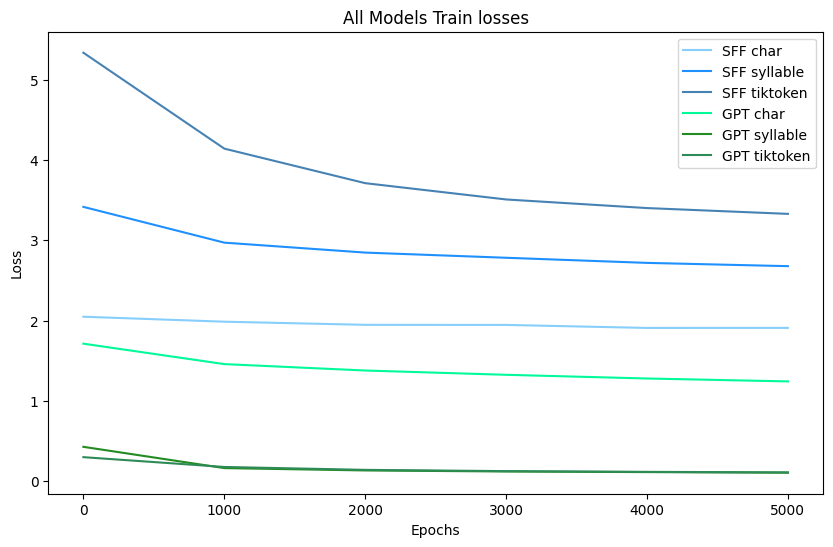

In [ ]:
train_losses = []
for i in sff_train_losses:
    train_losses.append(i)
for i in gpt_train_losses:
    train_losses.append(i)

plot_results(train_losses,False,True,"All Models Train losses")

From the image above, it is possible to see that the three GPT models sit under the three SFF models, with an inverse ordering in loss values with respect to the SFF models: from highest train loss in GPT char to lowest train loss in GPT tiktoken.

The general lower train loss values for the GPT models suggest that this more complex architecture is more capable of learning than the Simple Feed Forward model, thesis empirically proven with the text comparation. Even if the amount of data used was the same, the GPT models with even more parameters than the SFF ones were able to train better.

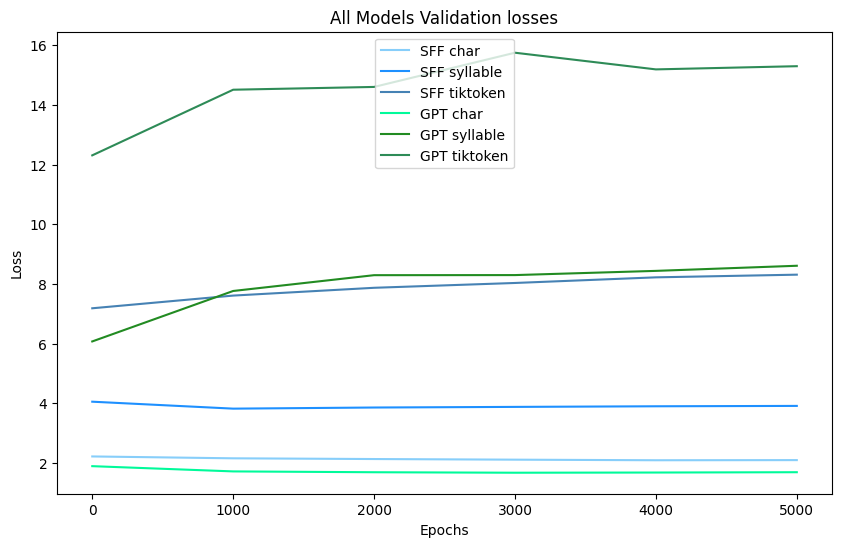

In [ ]:
val_losses = []
for i in sff_val_losses:
    val_losses.append(i)
for i in gpt_val_losses:
    val_losses.append(i)
plot_results(val_losses,False,True,"All Models Validation losses")

From the image above, it is possible to see that all Syllable and TikToken tokenizers' model have a tendency to overfit on the training data, as it was intended for the purpose of the project of generating Shakespeare's plays, while Char tokenizer models tends to decrease, showing a not overfitting behaviour. This latter fact furtherly explains why the Char tokenizer's models were the worst performing among the six. 

For the scope of the project it is possible to conclude that the GPT model with the tiktoken tokenizer is the best one in terms of generated text, because it includes in the tokenization algorithm some advanced mechanics that better captures the natural language behaviour. However the Syllable tokenization method proved to be of comparable performancesto TikToken tokenizer in both models, achieving similar results with less parameters and therefore less computational effort, even if the tokenization process is much simpler than the one of Tiktoken.

An improvement for the future of this project could be vary in the training data to try to create a story teller using books of same eras, like 1984 and Brave New World, to see if further training can lead to even better results.